In [1]:
import paddlehub as hub
import os
from wordcloud import WordCloud, STOPWORDS

In [2]:
lac = hub.Module(name="lac")    # 加载lac模型，LAC是Lexical Analysis of Chinese的首字母缩写

[2022-07-26 07:32:19,376] [ WARNING] - The _initialize method in HubModule will soon be deprecated, you can use the __init__() to handle the initialization of the object


In [3]:
# 分词
def lexical(texts):
    results = lac.cut(text=texts, use_gpu=False, batch_size=1, return_tag=True)
    return results

#### lac模型的词性tag标签含义：
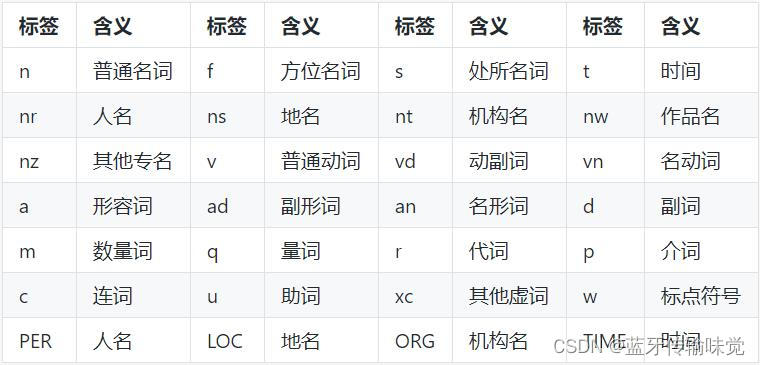

In [4]:
# 词汇 提取
def lexical_extract(texts=None, properties=None, exclude=False):
    """
    reverse: exclude=True时，排除所选properties中的词性
    """
    if not exclude:
        return [[word_tag[0] for word_tag in zip(text['word'], text['tag']) if word_tag[1] in properties] for text in texts]
    else :
        return [[word_tag[0] for word_tag in zip(text['word'], text['tag']) if word_tag[1] not in properties] for text in texts]

In [8]:
def save_wordcloud(words, word_lens=None, name=None):
    wc = WordCloud(
        font_path='./font/Deng.ttf',
        width=1920,
        height=1080,
        max_font_size=72,
        min_font_size=6,
        max_words=word_lens,
        random_state=42,
    )
    wc.generate(words)
    wc.to_file(os.path.join('./hot_news_wordcloud', name + '.png'))

In [126]:
# lexical_extract(analysis, ['nr', 'nz', 'PER', 'ns', 'LOC', 's', 'nt', 'ORG', 'nw', ]) # 地点、人名、
# lexical_extract(analysis, ['c', 'u', 'r', 'd',  'p', 'w'], reverse=True)

In [9]:
base_path = r'.\hot_news'
time_paths = os.listdir(base_path)
time_paths
for path in time_paths:
    titles = []
    file_paths = os.path.join(base_path, path)
    file_names = os.listdir(file_paths)
    for name in file_names:
        titles += [name.split('.csv')[0]]
    analysis_tokenizer = lexical(titles)
    analysis = lexical_extract(analysis_tokenizer, ['c', 'u', 'r', 'd',  'p', 'w'], exclude=True)
    words = ''.join([' '.join(word) for word in analysis])
    word_lens = len(words.split(' '))
        
    print('{}保存中。。。。'.format(path))
    save_wordcloud(words, word_lens, path)

2022-07-18保存中。。。。
2022-07-19保存中。。。。
2022-07-20保存中。。。。
2022-07-21保存中。。。。
2022-07-22保存中。。。。
2022-07-23保存中。。。。
2022-07-24保存中。。。。
2022-07-25保存中。。。。
2022-07-26保存中。。。。


In [139]:
len(''.join([' '.join(word) for word in analysis]).split(' ')), ''.join([' '.join(word) for word in analysis])

(414,
 '2名 美国 雇佣 兵 乌克兰 东部 死亡41款 新能源车夏 测 实战48岁 姥姥 抱 外 孙女 遛弯 误 认为 母女82岁 老人 游泳 续卡 遭拒 起诉 健身馆98年 女孩 做 陪诊师 月入 1.5万C919 六架 试飞机 完成 全部 试飞南京 发布 深夜 发文 不会 忘记天才基本法 演员 阵容 有 强新闻联播 直播上海 高考 本科 批次 录取 控制 分数线东北 小伙 国外 送 外卖 月入 1万美元中国 麻辣烫 火爆 韩国今日大暑体验 服 姜子牙 技能 解析余华 做 核酸 小说 杨姓 女 主 改姓 yin知道 大暑 农谚俄乌 签 重要 协议 粮食 危机 有 解 了 吗俄 称 摧毁 多套 美制 海马斯 火箭炮北京多区 买 榴莲 西 施 食品者 请 报备南京一公园 墙壁 红 漆 写 30万南京 玄奘寺 禁止 游客 入 内台 船只 未经 日方 许可 搞 海洋 调查后妈 帮 男孩 擦汗 感谢 送 懂事 孩子唐山 再现 打人 事件 8名 嫌犯 到案国务院 介绍 新 冠疫苗 安全性 有效性国务院 取消 29个 罚款 事项美 被害 中国 女 留学生 注射 毒品培养 公务员 专业 83所 大学 抛弃多名 众议员 促拜 登 宣布 进入 紧急状态多名 儿童 感染 腺病毒 涉 事 泳馆 立案大众汽车 CEO 赫伯特·迪斯 突然 离职天津 游客 玩 高空 项目 昏迷 后 坠亡女子 坐 公交 拒 戴口罩 称 承德 归 管评价 少年派2 演员 演技官方 国 新 冠疫苗 安全性 符合 国际标准官方 新 冠疫苗 接种 不会 引发 白血病小伙 拆 陆军装甲兵学院 录取通知书中国 经济发展 充满信心国 新 冠疫苗 全程 接种率 为 89.7%国 舰载 直升机 完成 船 载 试飞护士 针头 留 幼童 头 中 手术 取 出拉姆案 罪犯 母亲 首发 声 接受 死刑 结果拉姆 烧伤 致死 案 罪犯 执行 死刑数据 揭秘 十大 焖 蒸 城市日本女足 4 1 逆转 中国 台北最后 一只 长江 白鲟 救助者 悲痛 落泪最大 退休 潮 将至 中国 应对林志颖 发生 车祸 时 救护车 经过林志颖 大哥 称 弟弟 昏迷林志颖 赛车 脚掌 断掉 三根 骨头林志颖 赛车 梦楼盘 每天 表演性 复工 业主 崩溃 大哭正邦科技 陷代 养户断料 风波武汉东西湖区 出 新招 刺激 楼市泽连斯基 俄 停火 会 延长 冲

In [129]:

analysis_tokenizer

[{'word': ['2名', '美国', '雇佣', '兵', '在', '乌克兰', '东部', '死亡'],
  'tag': ['m', 'LOC', 'v', 'n', 'p', 'LOC', 'f', 'v']},
 {'word': ['41款', '新能源车夏', '测', '实战'], 'tag': ['m', 'nz', 'v', 'n']},
 {'word': ['48岁', '姥姥', '抱', '外', '孙女', '遛弯', '被', '误', '认为', '母女'],
  'tag': ['m', 'n', 'v', 'f', 'n', 'v', 'p', 'ad', 'v', 'n']},
 {'word': ['82岁', '老人', '游泳', '续卡', '遭拒', '起诉', '健身馆'],
  'tag': ['m', 'n', 'v', 'n', 'v', 'v', 'n']},
 {'word': ['98年', '女孩', '做', '陪诊师', '月入', '1.5万'],
  'tag': ['TIME', 'n', 'v', 'n', 'v', 'm']},
 {'word': ['C919', '六架', '试飞机', '完成', '全部', '试飞'],
  'tag': ['nz', 'm', 'n', 'v', 'n', 'vn']},
 {'word': ['“', '南京', '发布', '”', '深夜', '发文', '：', '不会', '忘记'],
  'tag': ['w', 'LOC', 'v', 'w', 'TIME', 'v', 'w', 'v', 'v']},
 {'word': ['《', '天才基本法', '》', '的', '演员', '阵容', '有', '多', '强'],
  'tag': ['w', 'nw', 'w', 'u', 'n', 'n', 'v', 'd', 'a']},
 {'word': ['《', '新闻联播', '》', '正在', '直播'], 'tag': ['w', 'nw', 'w', 'd', 'v']},
 {'word': ['上海', '高考', '本科', '各', '批次', '录取', '控制', '分数线'],
  'ta